<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: Data Science Salary 2024 | Minh Hai Tran_part 2</h1></div>
<div style="position:relative; float:right">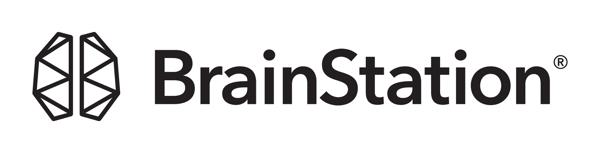
</div>
</div>

-----------------------------------
(Continue from part 1)
## Date March 2024
## EDA

# Introduction

In the dynamic field of data science, understanding salary trends is crucial for professionals and organizations. This dataset provides insights into Data Science Salaries from 2020 to 2024, offering valuable information on trends, regional variations, and factors influencing compensation for data enthusiasts, researchers, and industry professionals.

# Impact
This project is anticipated to bring tangible benefits to both society and businesses. By leveraging advanced technology, the aim is to assist companies in setting salaries more effectively, thereby increasing employee satisfaction and reducing turnover rates. This could potentially save businesses expenses associated with hiring and training new staff. Additionally, by streamlining the salary negotiation process, both employees and companies can save valuable time. Moreover, offering fair and competitive pay can help companies attract top talent, giving them a competitive edge in the market. In essence, the project aims to enhance the salary determination process for all stakeholders involvd

# About data
The primary dataset was multiple datasets sourced from ai-jobs.net and kaggle, consisting 9,476 rows and 11 columns as data Dictionary below.

#### Data Dictionary


| Column Name       | Description                                                                                                        |
|-------------------|--------------------------------------------------------------------------------------------------------------------|
| work_year         | The year when the salary was paid.                                                                                 |
| experience_level  | The job experience level categorized as follows: EN (Entry-level / Junior), MI (Mid-level / Intermediate), SE (Senior-level / Expert), EX (Executive-level / Director). |
| employment_type   | Type of employment for the role: PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance).                  |
| job_title         | The role held during the year.                                                                                     |
| salary            | Total gross salary amount paid.                                                                                    |
| salary_currency   | Currency of the salary paid as an ISO 4217 currency code.                                                          |
| salary_in_usd     | Salary converted to USD using statistical data from the BIS and central banks.                                      |
| employee_residence| Employee's primary country of residence during the work year as an ISO 3166 country code.                          |
| remote_ratio      | The percentage of work done remotely, categorized as: 0 (No remote work), 50 (Partially remote/hybrid), 100 (Fully remote).|
| company_location  | Country of the employer's main office or contracting branch as an ISO 3166 country code.                          |
| company_size      | The average number of employees in the company, categorized as: S (Less than 50 employees), M (50 to 250 employees), L (More than 250 employees).  |



___

### Table of content:
#### Part 1: Load libraries and dataset
- Load libraries and Load cleaned dataset
- 
#### Part 2: Visualization of target feature
- 2.1: Distribution of salary_in_usd
- 2.2: Variables of salary_in_usd
- 2.3: Salary Trend Over Time
- 
#### Part 3: Visualization of engineering fetures
- 3.1: Top 20 popular jobs
- 3.2:Top 20 popular jobs in Canada- 3.3: Percentage frequency of salary currencies
- 3.4: Number of occurences per year
- 3.5: Top 10 job with high salaries.
#### Part 4: Visulization of feature and target relations
- 4.1: Avarage Salary of Top 10 job title in Canada
- 4.2: Distribution salary by of remote job 
- 4.3: Distribution salary by company size
- 4.4: Distribution salary by experience level
- 
#### Part 5: Recommendations
- Position for entry level with a salary range less than $80,000

----

### Part 1: Load libraries and dataset

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('dataset_new/cleaned_merged_df.csv')

# The info of dataset
df.info()

# sample of data
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9476 non-null   int64 
 1   experience_level    9476 non-null   object
 2   employment_type     9476 non-null   object
 3   job_title           9476 non-null   object
 4   salary              9476 non-null   int64 
 5   salary_currency     9476 non-null   object
 6   salary_in_usd       9476 non-null   int64 
 7   employee_residence  9476 non-null   object
 8   remote_ratio        9476 non-null   int64 
 9   company_location    9476 non-null   object
 10  company_size        9476 non-null   object
dtypes: int64(4), object(7)
memory usage: 814.5+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
218,2024,SE,FT,Data Architect,84500,USD,84500,US,100,US,M


The data has been cleaned on part 1 so on this part we will explore EDA of the data.

### Part 2: Visualization of target feature

we choose salary_in_usd is the target to predict. So firsly, let explore this column

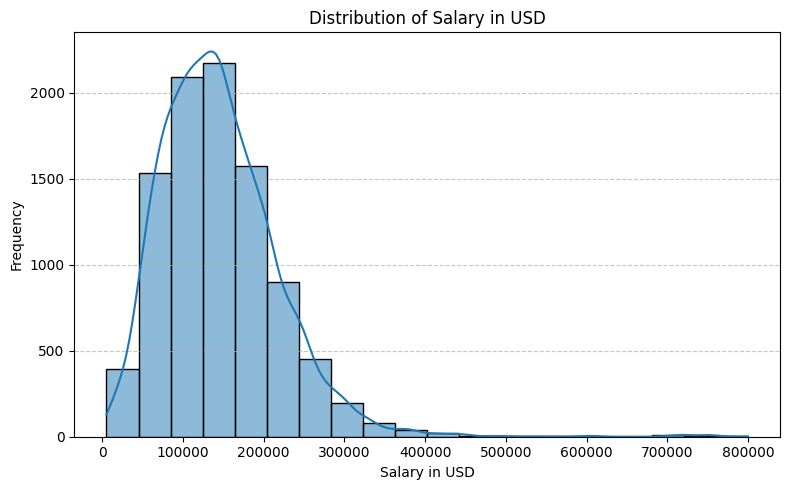

In [3]:
# Plot the histogram using Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(df, x='salary_in_usd', bins=20, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='salary_in_usd'>

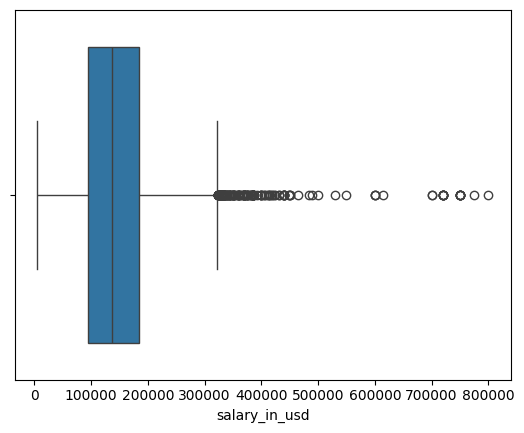

In [4]:
#Exploring the target
sns.boxplot(x=df['salary_in_usd'])

The distribution is skewed to the left with variables distribute on the right. Later we need to modified the data a little bit in the part 3 before modelling process.

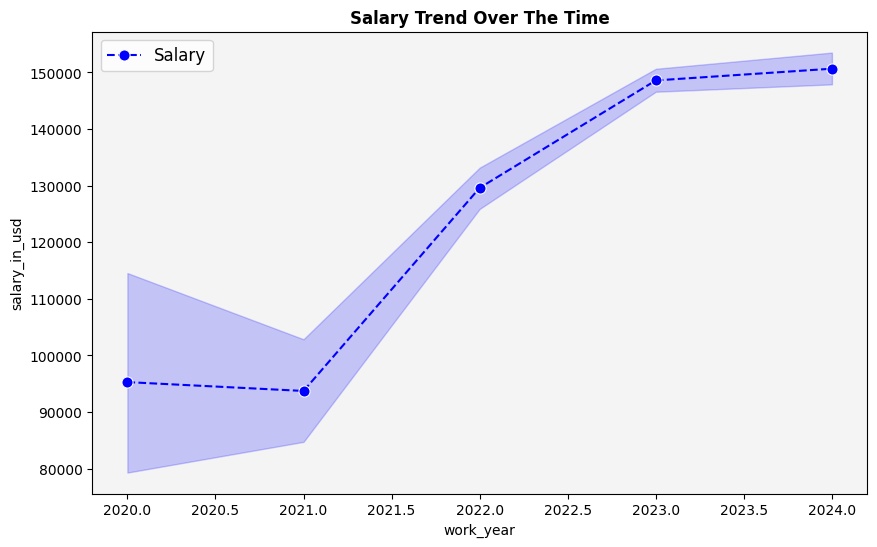

In [5]:
# Data science salary trends (2020-2024)
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

### Insight:
- There wasn't much change in salary from 2020 to 2021.
- Continual changes occurred in salary from 2021 to 2023.
- The progress in salary from 2023 to 2024 followed a similar pattern.

### Part 3: Visualization of engineering fetures


In [6]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [7]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [8]:
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [9]:
#Replace values in Remote ratio column
df['remote_ratio'] = df['remote_ratio'].replace('0', "On-site")
df['remote_ratio'] = df['remote_ratio'].replace('50', "Hybrid")
df['remote_ratio'] = df['remote_ratio'].replace('100', "Remotely")

#### 3.1: Top 20 popular jobs

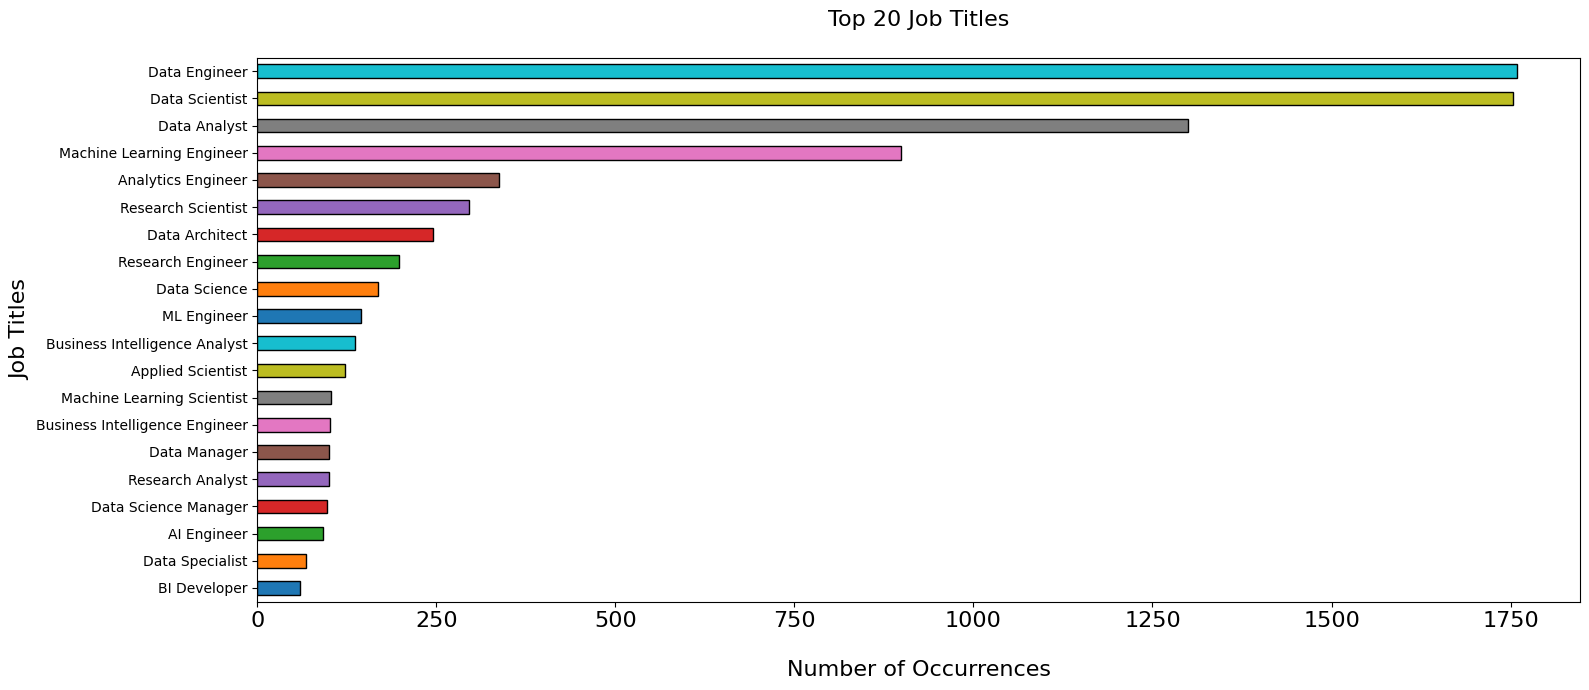

In [10]:
# List of top 20 popular job in data tech
top_20_job_title = df["job_title"].value_counts()[:20]
plt.figure(figsize=(16, 7))
top_20_job_title.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette(), edgecolor='black')
plt.ylabel('Job Titles', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Top 20 Job Titles\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show()

Data Engineering and Data Scientist are top 2 of most popular job titles over the world.

#### 3.2: Top 20 popular jobs in Canada

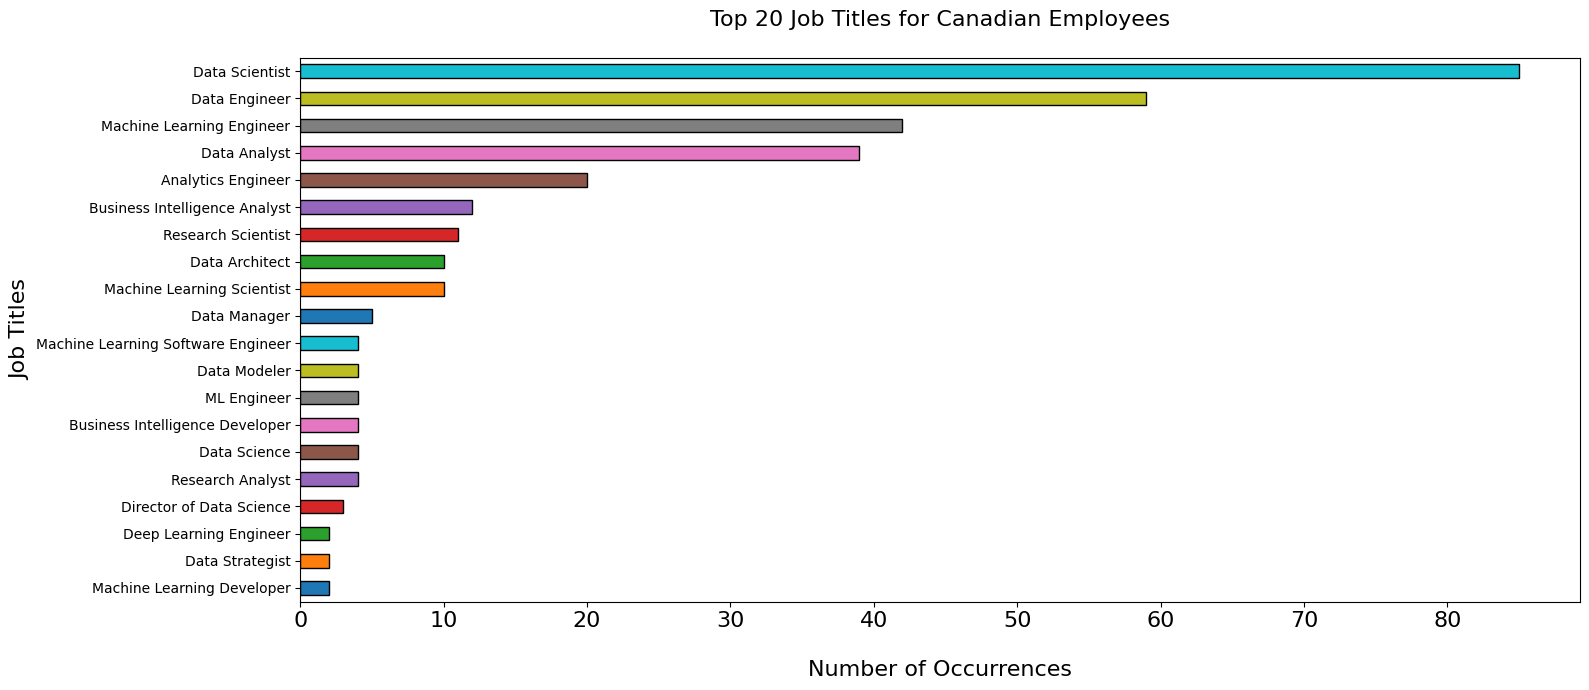

In [11]:
# Filter the DataFrame for employees residing in Canada
canadian_employees = df[df['employee_residence'].isin(['CA', 'Canada'])]

# List of top 20 popular job titles in data tech for Canadian employees
top_20_job_title = canadian_employees["job_title"].value_counts()[:20]

# Plot the top 20 job titles
plt.figure(figsize=(16, 7))
top_20_job_title.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette(), edgecolor='black')
plt.ylabel('Job Titles', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Top 20 Job Titles for Canadian Employees\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show()


Data Engineering and Data Scientist are top 2 of most popular job titles in Canada.

#### 3.3: Percentage frequency of salary currencies

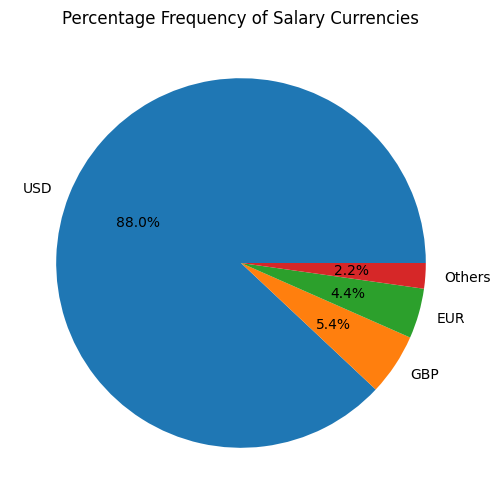

In [12]:
# how percentage of dollar?
percentage_frequency = df['salary_currency'].value_counts(normalize=True) * 100

# Create a new DataFrame for 'Others'
others = percentage_frequency[percentage_frequency < 1.0].sum()
percentage_frequency = percentage_frequency[percentage_frequency >= 1.0]

# Append 'Others' to the DataFrame
percentage_frequency = pd.concat([percentage_frequency, pd.Series([others], index=['Others'])])

# Create the pie plot
plt.figure(figsize=(10, 6))
plt.pie(percentage_frequency, labels = percentage_frequency.index, autopct='%1.1f%%')
plt.title('Percentage Frequency of Salary Currencies')

# Show the plot
plt.show()



USD is the most popular currency is used to pay in tech jobs.

#### 3.4  Number of occurences per year

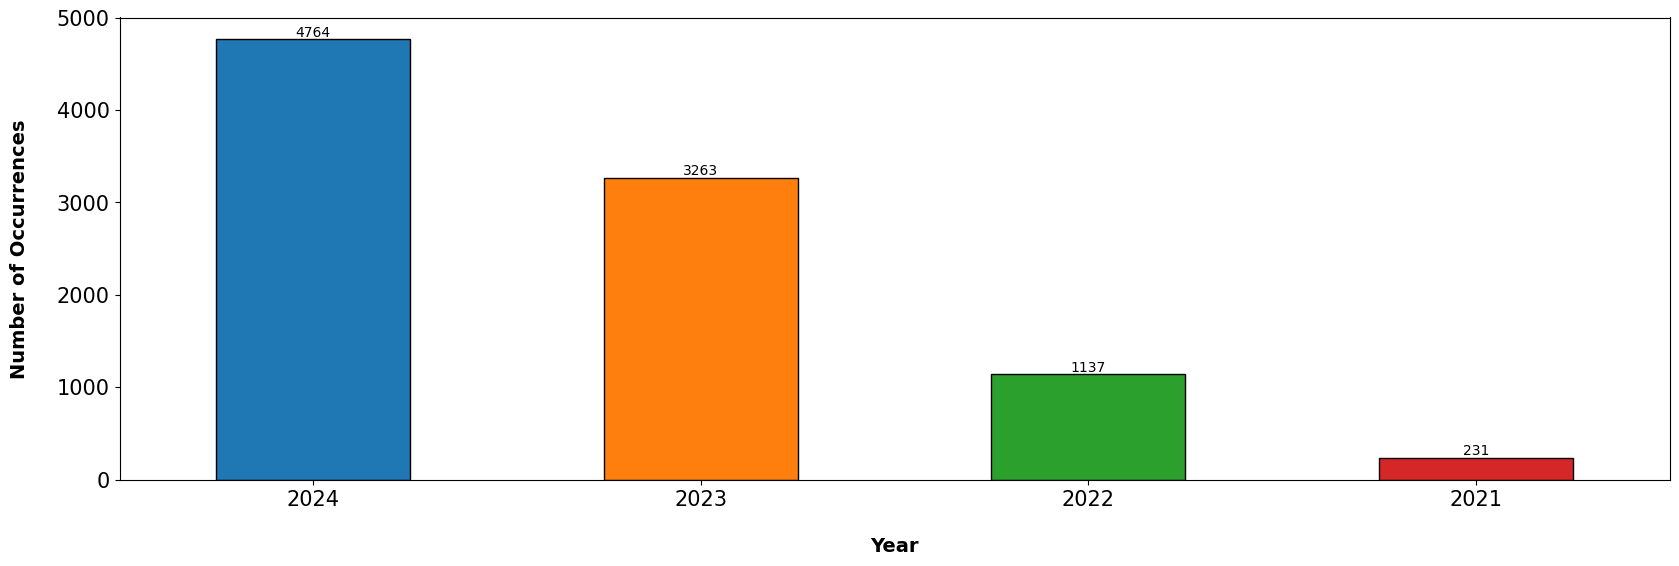

In [13]:
# Filter out work years from 2024 to 2021
filtered_df = df[df['work_year'].isin([2024, 2023, 2022, 2021])]

plt.figure(figsize=(20, 6))
ax = filtered_df["work_year"].value_counts().plot(kind='bar', color=sns.color_palette(), edgecolor='black', rot=0)
ax.set_xticklabels(('2024', '2023', '2022', '2021'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15) 

plt.xlabel('Year', weight="bold", color="black", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="black", fontsize=14, labelpad=20)

plt.show()

The data we have are the latest data with most of data in 2024 and 2023

### Part 4: Visulization of feature and target relations

#### 4.1: Avarage Salary of Top 10 job title in Canada

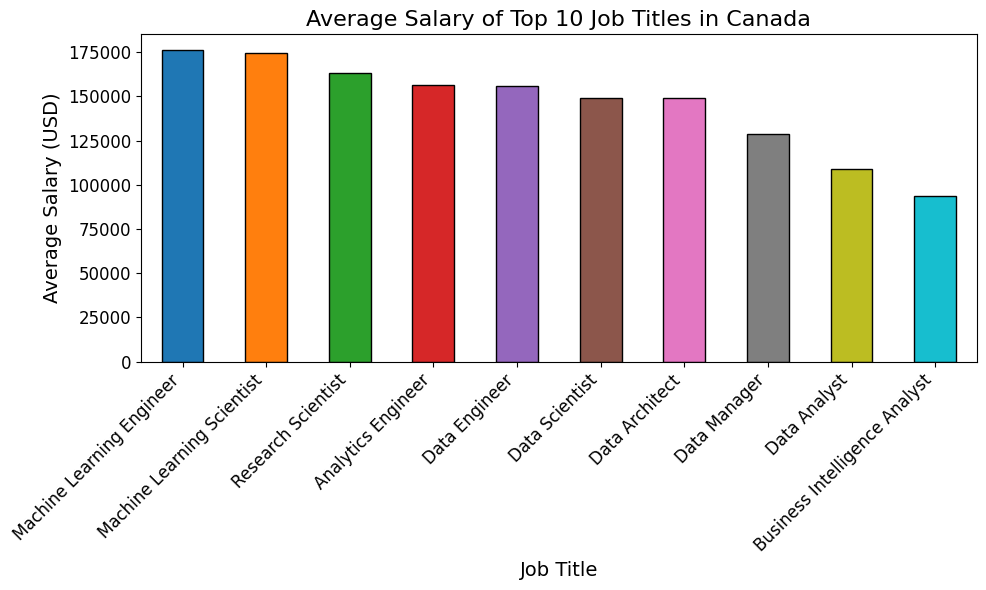

In [14]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Count occurrences of each job title
job_title_counts = df_canada['job_title'].value_counts()

# Select top 10 job titles
top_10_job_titles = job_title_counts.head(10)

# Calculate average salary for each job title
average_salary_by_job_title = df_canada.groupby('job_title')['salary'].mean().loc[top_10_job_titles.index]

# Sort the top 10 job titles and average salaries in descending order
average_salary_by_job_title = average_salary_by_job_title.sort_values(ascending=False)

# Plot distribution of top 10 job titles with average salary in Canada
plt.figure(figsize=(10, 6))
average_salary_by_job_title.plot(kind='bar', color=sns.color_palette(), edgecolor='black')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=14)
plt.title('Average Salary of Top 10 Job Titles in Canada', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### 4.2: Distribution salary by of remote job 

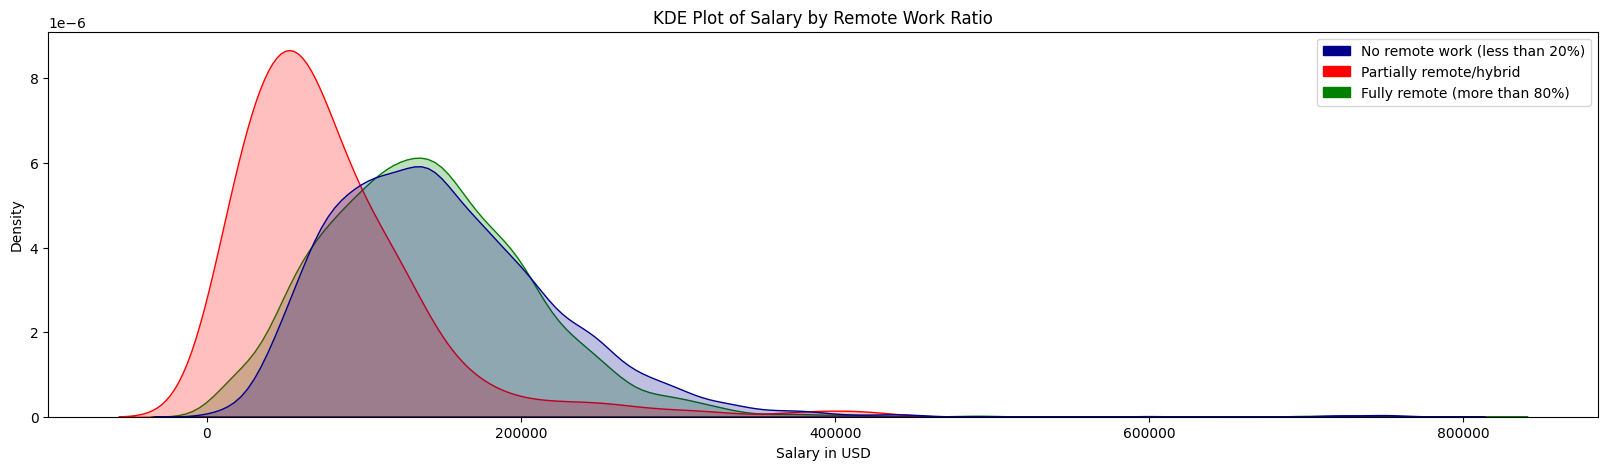

In [15]:
# Correctly define custom hue labels for remote work categories
custom_hue_labels = {
    '0': 'No remote work (less than 20%)',
    '50': 'Partially remote/hybrid',
    '100': 'Fully remote (more than 80%)'
}
custom_colors = {
    '0': 'darkblue', 
    '50': 'red', 
    '100': 'green'
}

# Since 'remote_ratio' might be stored as integer, ensure keys are strings for matching
df['remote_ratio'] = df['remote_ratio'].astype(str)

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Remote Ratio
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='salary_in_usd', hue='remote_ratio', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Remote Work Ratio')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()


#### 4.3 salary trend over time by company size

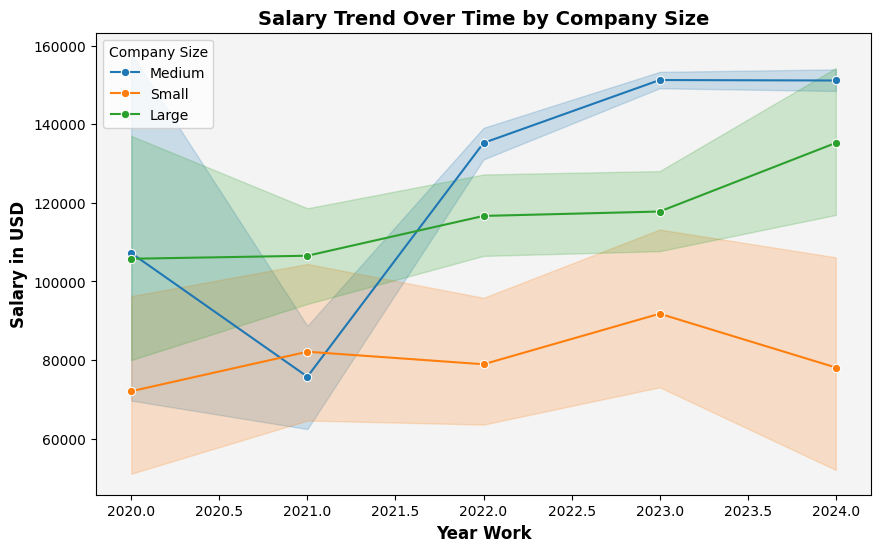

In [16]:

# salary trend over time by company size 
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

#### 4.4: Distribution salary by experience level

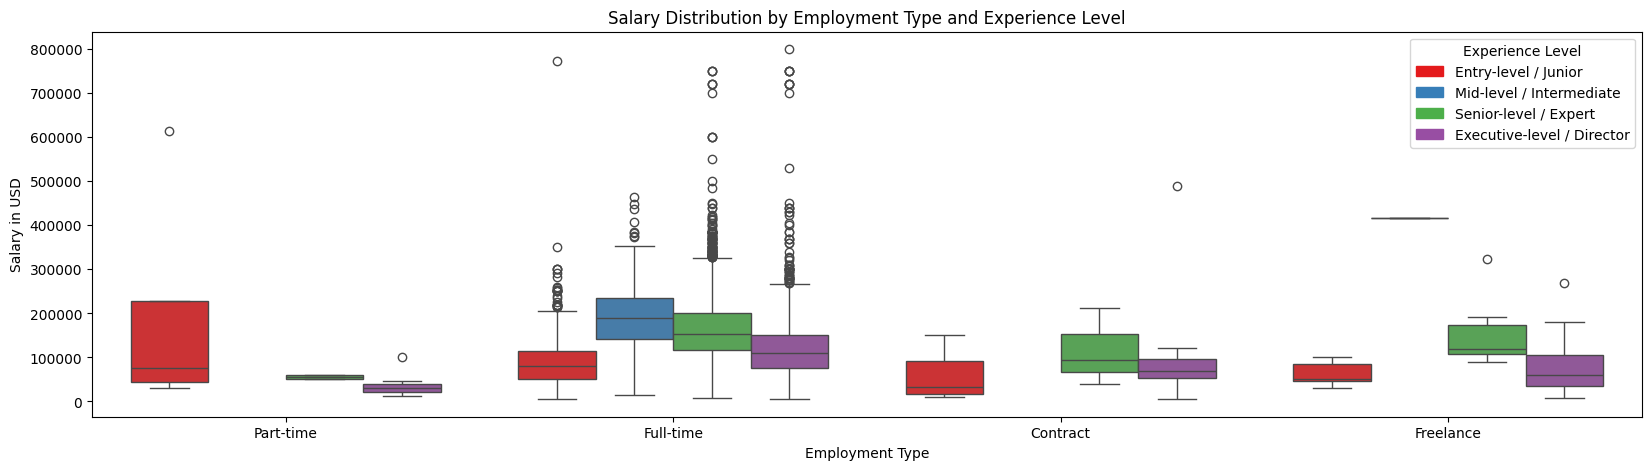

In [17]:
# Average salary by experience level
# Define custom hue labels and x-axis tick labels
custom_hue_labels = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}
custom_x_labels = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance'}

# Boxplot for Salary Distribution by Employment Type and Experience Level
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', hue='experience_level', palette='Set1')

# Set title and labels
plt.title('Salary Distribution by Employment Type and Experience Level')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')

# Set custom x-axis tick labels
plt.xticks(ticks=range(len(custom_x_labels)), labels=custom_x_labels.values())

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette('Set1', n_colors=len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values(), title='Experience Level')

plt.show()

#### 4.5: Top 10 job ttles with high salaries

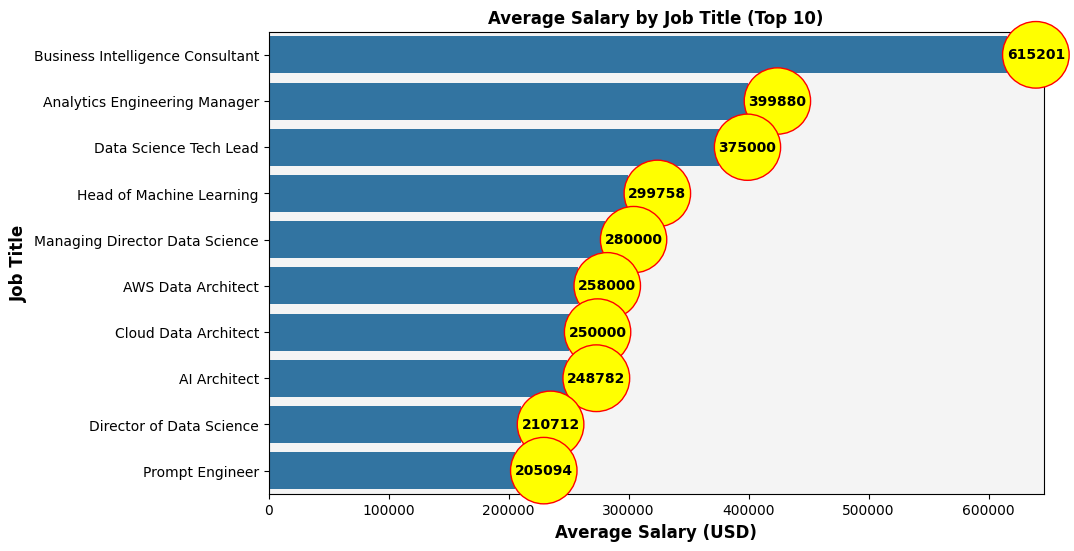

In [18]:
# top 10 salary based on job_title
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'
                
               
               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

# Insight
- Data Science Tech Lead has the highest average salary at 375,000 USD.
- 
Cloud Data Architect and Data Lead also have notably high salaries
- 
The top 10 job titles exhibit strong earning potential in the data science field.

### Part 5: Position for entry level with a salary range less than $80,000

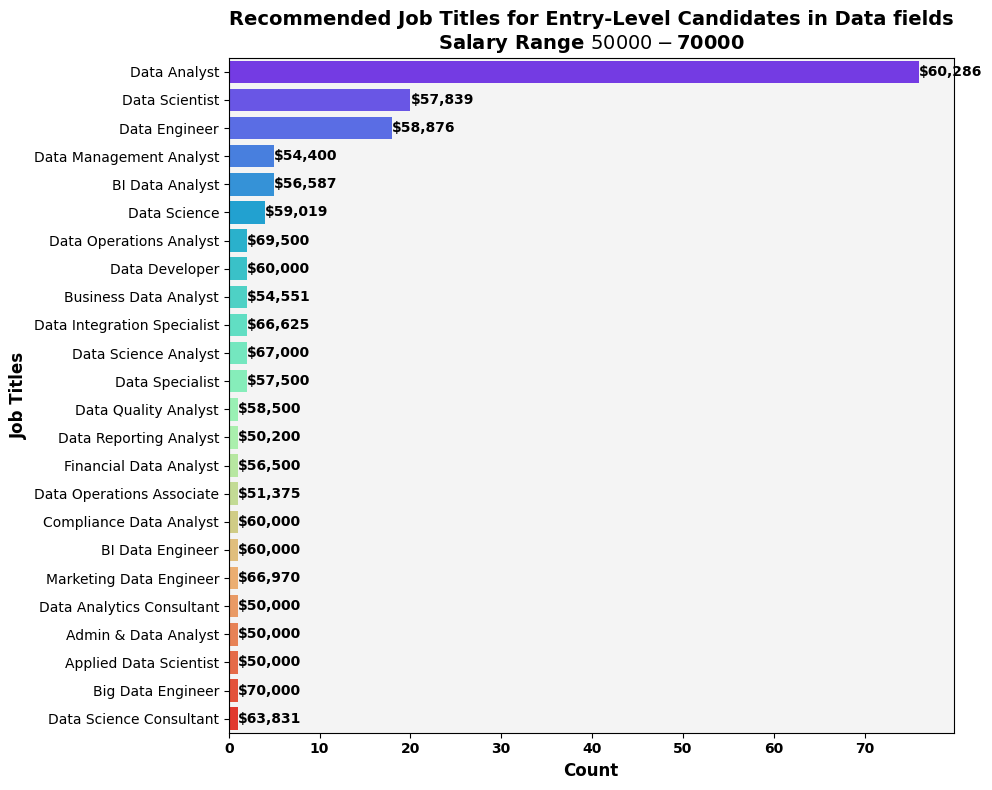

In [19]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_job_title_keyword = "data"  # Keyword to search for in job title
desired_salary_range = (50000, 70000)  # Desired salary range in USD

# Filter the dataset based on experience level, job title, and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['job_title'].str.contains(desired_job_title_keyword, case=False)) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Calculate average salary for each job title
average_salary_by_title = filtered_df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Merge average salary back to the job title counts
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']
job_title_counts = job_title_counts.merge(average_salary_by_title, how='left', left_on='Job Title', right_on='job_title')

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates in Data fields\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

# Add annotations to the bar plot
for index, row in job_title_counts.iterrows():
    ax.text(row['Count'], index, f"${int(row['salary_in_usd']):,}", color='black', ha="left", va="center", fontweight='bold', fontsize=10)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

We will continue working with machine learning model in the next part.

--- to be continued--